# WeatherPy
----

### Analysis
* The weather becomes significantly hotter as one approaches the equator (Latitude=0 degress), which is expected. 
* There is no strong relationship between latitude and wind speed. However, in the southern hemisphere, there are more outliers and places of high wind.
* The cloudiness of cities is spread out a bunch, but there highest number o fcities have no cloudiness, or very low cloudiness. 

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
import json
import requests as req
import random
import seaborn as sns
import pandas as pd
import math as math
import time
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import warnings
warnings.filterwarnings('ignore')

output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
lat_lngs = []
cities = []
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

623

In [30]:
location_data = pd.DataFrame()
location_data['lat_coords'] = [np.random.uniform(-90, 90) for x in range(1500)]
location_data['lng_coords'] = [np.random.uniform(-180, 180) for x in range(1500)]
location_data.head()

,lat_coords,lng_coords
0,1.662678,-116.260358
1,-80.095859,-52.112264
2,-2.449999,-97.132087
3,61.152595,30.990329
4,61.757728,41.376529


In [31]:
location_data['city'] = ''
location_data['country'] = ''

count = 0
for index, row in location_data.iterrows():
    near_city = citipy.nearest_city(row['lat_coords'], row['lng_coords']).city_name
    near_country = citipy.nearest_city(row['lat_coords'], row['lng_coords']).country_code
    location_data.set_value(index,"city",near_city)
    location_data.set_value(index,"country",near_country)
location_data.head()

,lat_coords,lng_coords,city,country
0,1.662678,-116.260358,san patricio,mx
1,-80.095859,-52.112264,ushuaia,ar
2,-2.449999,-97.132087,puerto ayora,ec
3,61.152595,30.990329,lyaskelya,ru
4,61.757728,41.376529,ust-shonosha,ru


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
len(location_data)

1500

In [33]:
location_data=location_data.drop_duplicates(['city','country'],keep = "first")
location_data['Temp'] = ''
location_data['Humidity'] = ''
location_data['Cloudiness'] = ''
location_data['Wind Speed'] = ''
location_data["Latitude"] = ''
location_data["Longitude"] = ''

sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'
location_data.head()

,lat_coords,lng_coords,city,country,Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,1.662678,-116.260358,san patricio,mx,,,,,,
1,-80.095859,-52.112264,ushuaia,ar,,,,,,
2,-2.449999,-97.132087,puerto ayora,ec,,,,,,
3,61.152595,30.990329,lyaskelya,ru,,,,,,
4,61.757728,41.376529,ust-shonosha,ru,,,,,,


In [34]:
api_key = '859d8e057029f69c3ee7bad557a69552'
record = 0
for index, row in location_data.iterrows():
    city_name = row['city']
    country_code = row['country']
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    print (url)
    try: 
        weather_response = req.get(url)
        weather_json = weather_response.json()
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        location_data.set_value(index,"Temp", temp)
        location_data.set_value(index,"Humidity",humidity)
        location_data.set_value(index,"Wind Speed", wind)
        location_data.set_value(index,"Cloudiness",cloud)
        location_data.set_value(index,"Latitude", latitude)
        location_data.set_value(index,"Longitude",longitude)
        print("Retrieved data for %s, %s" % (city_name, country_code))
    except:
        print("No data for %s, %s" % (city_name,country_code))
    record += 1
    if record % 59 == 0:
        time.sleep(60)

http://api.openweathermap.org/data/2.5/weather?q=san patricio,mx&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for san patricio, mx
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for ushuaia, ar
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for puerto ayora, ec
http://api.openweathermap.org/data/2.5/weather?q=lyaskelya,ru&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for lyaskelya, ru
http://api.openweathermap.org/data/2.5/weather?q=ust-shonosha,ru&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for ust-shonosha, ru
http://api.openweathermap.org/data/2.5/weather?q=yar-sale,ru&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for yar-sale, ru
http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&units=imperial&APPID=859d8e05702

Retrieved data for arraial do cabo, br
http://api.openweathermap.org/data/2.5/weather?q=clyde river,ca&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for clyde river, ca
http://api.openweathermap.org/data/2.5/weather?q=del rio,us&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for del rio, us
http://api.openweathermap.org/data/2.5/weather?q=mar del plata,ar&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for mar del plata, ar
http://api.openweathermap.org/data/2.5/weather?q=tautira,pf&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for tautira, pf
http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for cape town, za
http://api.openweathermap.org/data/2.5/weather?q=chuy,uy&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for chuy, uy
http://api.openweathermap.org/data/2.5/weather?q=krasnoselkup,ru&units=im

Retrieved data for pochutla, mx
http://api.openweathermap.org/data/2.5/weather?q=nuuk,gl&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for nuuk, gl
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for upernavik, gl
http://api.openweathermap.org/data/2.5/weather?q=sitka,us&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for sitka, us
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for saint-philippe, re
http://api.openweathermap.org/data/2.5/weather?q=la libertad,sv&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for la libertad, sv
http://api.openweathermap.org/data/2.5/weather?q=dickinson,us&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for dickinson, us
http://api.openweathermap.org/data/2.5/weather?q=yuzhno-kurilsk,ru&units=imper

Retrieved data for mahebourg, mu
http://api.openweathermap.org/data/2.5/weather?q=olafsvik,is&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
No data for olafsvik, is
http://api.openweathermap.org/data/2.5/weather?q=vila velha,br&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for vila velha, br
http://api.openweathermap.org/data/2.5/weather?q=bulgan,mn&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for bulgan, mn
http://api.openweathermap.org/data/2.5/weather?q=samusu,ws&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
No data for samusu, ws
http://api.openweathermap.org/data/2.5/weather?q=saint-georges,gf&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
No data for saint-georges, gf
http://api.openweathermap.org/data/2.5/weather?q=grindavik,is&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for grindavik, is
http://api.openweathermap.org/data/2.5/weather?q=henties bay,na&units=imperial&APPID=859d8e057029f

Retrieved data for kaeo, nz
http://api.openweathermap.org/data/2.5/weather?q=vao,nc&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for vao, nc
http://api.openweathermap.org/data/2.5/weather?q=banikoara,bj&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for banikoara, bj
http://api.openweathermap.org/data/2.5/weather?q=ribeira grande,pt&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for ribeira grande, pt
http://api.openweathermap.org/data/2.5/weather?q=bengkulu,id&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
No data for bengkulu, id
http://api.openweathermap.org/data/2.5/weather?q=pacific grove,us&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for pacific grove, us
http://api.openweathermap.org/data/2.5/weather?q=kwinana,au&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for kwinana, au
http://api.openweathermap.org/data/2.5/weather?q=inhambane,mz&units=imperial&APPID=85

Retrieved data for fuerte olimpo, py
http://api.openweathermap.org/data/2.5/weather?q=tubruq,ly&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
No data for tubruq, ly
http://api.openweathermap.org/data/2.5/weather?q=pori,fi&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for pori, fi
http://api.openweathermap.org/data/2.5/weather?q=cherskiy,ru&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for cherskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=nouadhibou,mr&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for nouadhibou, mr
http://api.openweathermap.org/data/2.5/weather?q=saint-augustin,ca&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for saint-augustin, ca
http://api.openweathermap.org/data/2.5/weather?q=kiama,au&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for kiama, au
http://api.openweathermap.org/data/2.5/weather?q=bilma,ne&units=imperial&APPID=859d8e05702

Retrieved data for mabaruma, gy
http://api.openweathermap.org/data/2.5/weather?q=dekar,bw&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for dekar, bw
http://api.openweathermap.org/data/2.5/weather?q=rawson,ar&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for rawson, ar
http://api.openweathermap.org/data/2.5/weather?q=treinta y tres,uy&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for treinta y tres, uy
http://api.openweathermap.org/data/2.5/weather?q=pacasmayo,pe&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for pacasmayo, pe
http://api.openweathermap.org/data/2.5/weather?q=casa nova,br&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for casa nova, br
http://api.openweathermap.org/data/2.5/weather?q=caravelas,br&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for caravelas, br
http://api.openweathermap.org/data/2.5/weather?q=qaqortoq,gl&units=imperial&AP

Retrieved data for mareeba, au
http://api.openweathermap.org/data/2.5/weather?q=bolobo,cd&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for bolobo, cd
http://api.openweathermap.org/data/2.5/weather?q=berlevag,no&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for berlevag, no
http://api.openweathermap.org/data/2.5/weather?q=hunucma,mx&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for hunucma, mx
http://api.openweathermap.org/data/2.5/weather?q=murray,us&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for murray, us
http://api.openweathermap.org/data/2.5/weather?q=paradwip,in&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
No data for paradwip, in
http://api.openweathermap.org/data/2.5/weather?q=bathsheba,bb&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for bathsheba, bb
http://api.openweathermap.org/data/2.5/weather?q=baruun-urt,mn&units=imperial&APPID=859d8e057029f69c3e

Retrieved data for bella union, uy
http://api.openweathermap.org/data/2.5/weather?q=wellington,nz&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for wellington, nz
http://api.openweathermap.org/data/2.5/weather?q=margate,za&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for margate, za
http://api.openweathermap.org/data/2.5/weather?q=mugur-aksy,ru&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for mugur-aksy, ru
http://api.openweathermap.org/data/2.5/weather?q=faya,td&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
No data for faya, td
http://api.openweathermap.org/data/2.5/weather?q=shingu,jp&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for shingu, jp
http://api.openweathermap.org/data/2.5/weather?q=nalut,ly&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for nalut, ly
http://api.openweathermap.org/data/2.5/weather?q=elizabeth city,us&units=imperial&APPID=859d8e057029f6

Retrieved data for sechura, pe
http://api.openweathermap.org/data/2.5/weather?q=jiddah,sa&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
No data for jiddah, sa
http://api.openweathermap.org/data/2.5/weather?q=burgeo,ca&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for burgeo, ca
http://api.openweathermap.org/data/2.5/weather?q=kirakira,sb&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for kirakira, sb
http://api.openweathermap.org/data/2.5/weather?q=virginia beach,us&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for virginia beach, us
http://api.openweathermap.org/data/2.5/weather?q=lensk,ru&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for lensk, ru
http://api.openweathermap.org/data/2.5/weather?q=kapustin yar,ru&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for kapustin yar, ru
http://api.openweathermap.org/data/2.5/weather?q=rodrigues alves,br&units=imperial&APPID

Retrieved data for jumla, np
http://api.openweathermap.org/data/2.5/weather?q=chapais,ca&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for chapais, ca
http://api.openweathermap.org/data/2.5/weather?q=mount vernon,us&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for mount vernon, us
http://api.openweathermap.org/data/2.5/weather?q=hobyo,so&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for hobyo, so
http://api.openweathermap.org/data/2.5/weather?q=homer,us&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for homer, us
http://api.openweathermap.org/data/2.5/weather?q=sentyabrskiy,ru&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
No data for sentyabrskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=caucaia,br&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for caucaia, br
http://api.openweathermap.org/data/2.5/weather?q=southbridge,nz&units=imperial&APPID=859d8e05702

Retrieved data for zhireken, ru
http://api.openweathermap.org/data/2.5/weather?q=bardiyah,ly&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for bardiyah, ly
http://api.openweathermap.org/data/2.5/weather?q=dahuk,iq&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
No data for dahuk, iq
http://api.openweathermap.org/data/2.5/weather?q=pontes e lacerda,br&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for pontes e lacerda, br
http://api.openweathermap.org/data/2.5/weather?q=hayden,us&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for hayden, us
http://api.openweathermap.org/data/2.5/weather?q=assai,br&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for assai, br
http://api.openweathermap.org/data/2.5/weather?q=paciran,id&units=imperial&APPID=859d8e057029f69c3ee7bad557a69552
Retrieved data for paciran, id
http://api.openweathermap.org/data/2.5/weather?q=palocabildo,co&units=imperial&APPID=859d8e0570

In [35]:
location_data.head(25)

,lat_coords,lng_coords,city,country,Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,1.662678,-116.260358,san patricio,mx,82.4,78,75,11.41,19.22,-104.7
1,-80.095859,-52.112264,ushuaia,ar,50,61,40,34.45,-54.81,-68.31
2,-2.449999,-97.132087,puerto ayora,ec,80.6,78,75,12.75,-0.74,-90.35
3,61.152595,30.990329,lyaskelya,ru,7.49,83,56,5.08,61.77,31.02
4,61.757728,41.376529,ust-shonosha,ru,12.39,84,68,11.12,61.15,41.34
6,66.247725,69.462506,yar-sale,ru,1.68,89,20,10.45,66.83,70.83
7,-88.708947,72.958424,taolanaro,mg,,,,,,
8,-29.807990,71.172013,bambous virieux,mu,77,94,75,3.36,-20.34,57.76
9,-71.588719,-121.865408,rikitea,pf,79.94,100,64,10.67,-23.12,-134.97
10,-63.538324,97.126997,busselton,au,74.94,82,0,6.2,-33.64,115.35


In [36]:
len(location_data)

630

In [37]:
location_data.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

In [39]:
location_data['Latitude'] = pd.to_numeric(location_data['Latitude'], errors = 'coerce')
location_data['Temp'] = pd.to_numeric(location_data['Temp'], errors = 'coerce')
location_data['Humidity'] = pd.to_numeric(location_data['Humidity'], errors = 'coerce')
location_data['Wind Speed'] = pd.to_numeric(location_data['Wind Speed'], errors = 'coerce')
location_data['Cloudiness'] = pd.to_numeric(location_data['Cloudiness'], errors = 'coerce')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

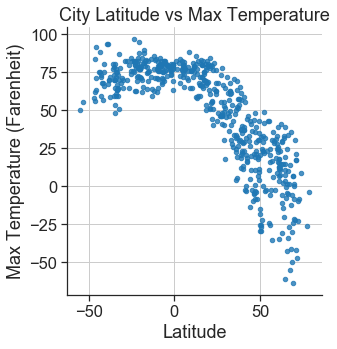

In [45]:
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

sns.lmplot('Latitude',
          'Temp',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("City Latitude vs Max Temperature")
plt.show()

#### Latitude vs. Humidity Plot

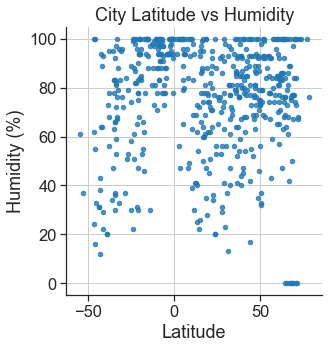

In [46]:
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

sns.lmplot('Latitude',
          'Humidity',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

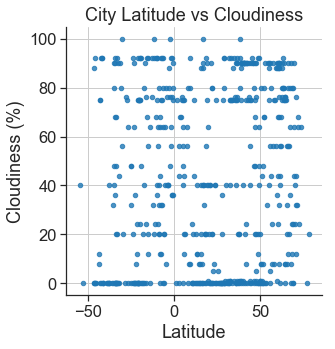

In [47]:
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

sns.lmplot('Latitude',
          'Cloudiness',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

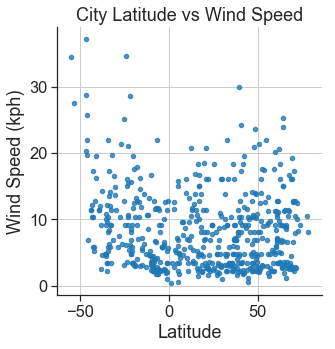

In [44]:
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

sns.lmplot('Latitude',
          'Wind Speed',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.title("City Latitude vs Wind Speed")
plt.show()